In [1]:
import numpy as np   # numerical computations
import pandas as pd    #dataframes and spreadsheets
pd.set_option('display.max_columns', 22)
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt      # visualisations and charts


from sqlalchemy import create_engine

In [2]:
#pip install mysql-connector-python #(option 2 for sqlalchemy)

You should consider upgrading via the '/Users/primalnotch/Desktop/loanprediction/py_env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
def get_table_sql(query):

    host="relational.fit.cvut.cz"
    user="guest"
    password="relational"

    connection_string_mysql = f"mysql+mysqlconnector://{user}:{password}@{host}"
    
    with create_engine(connection_string_mysql).connect() as connection:
        
        df = pd.read_sql_query(query, con=connection)
    
    return df


In [4]:
#importing data columns from SQL Database

loan = get_table_sql('''SELECT * FROM financial.loan;''')
acct = get_table_sql('''SELECT * FROM financial.account;''')
client = get_table_sql('''SELECT * FROM financial.client;''')
trans = get_table_sql('''SELECT * FROM financial.trans;''')
disp = get_table_sql('''SELECT * FROM financial.disp;''')

In [5]:
loan

,loan_id,account_id,date,amount,duration,payments,status
0,4959,2,1994-01-05,80952,24,3373.0,A
1,4961,19,1996-04-29,30276,12,2523.0,B
2,4962,25,1997-12-08,30276,12,2523.0,A
3,4967,37,1998-10-14,318480,60,5308.0,D
4,4968,38,1998-04-19,110736,48,2307.0,C
...,...,...,...,...,...,...,...
677,7294,11327,1998-09-27,39168,24,1632.0,C
678,7295,11328,1998-07-18,280440,60,4674.0,C
679,7304,11349,1995-10-29,419880,60,6998.0,C
680,7305,11359,1996-08-06,54024,12,4502.0,A


In [6]:
acct

,account_id,district_id,frequency,date
0,1,18,POPLATEK MESICNE,1995-03-24
1,2,1,POPLATEK MESICNE,1993-02-26
2,3,5,POPLATEK MESICNE,1997-07-07
3,4,12,POPLATEK MESICNE,1996-02-21
4,5,15,POPLATEK MESICNE,1997-05-30
...,...,...,...,...
4495,11333,8,POPLATEK MESICNE,1994-05-26
4496,11349,1,POPLATEK TYDNE,1995-05-26
4497,11359,61,POPLATEK MESICNE,1994-10-01
4498,11362,67,POPLATEK MESICNE,1995-10-14


In [7]:
client

,client_id,gender,birth_date,district_id
0,1,F,1970-12-13,18
1,2,M,1945-02-04,1
2,3,F,1940-10-09,1
3,4,M,1956-12-01,5
4,5,F,1960-07-03,5
...,...,...,...,...
5364,13955,F,1945-10-30,1
5365,13956,M,1943-04-06,1
5366,13968,M,1968-04-13,61
5367,13971,F,1962-10-19,67


In [8]:
trans

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,1995-03-24,PRIJEM,VKLAD,1000,1000,None,None,NaN
1,5,1,1995-04-13,PRIJEM,PREVOD Z UCTU,3679,4679,None,AB,41403269.0
2,6,1,1995-05-13,PRIJEM,PREVOD Z UCTU,3679,20977,None,AB,41403269.0
3,7,1,1995-06-13,PRIJEM,PREVOD Z UCTU,3679,26835,None,AB,41403269.0
4,8,1,1995-07-13,PRIJEM,PREVOD Z UCTU,3679,30415,None,AB,41403269.0
...,...,...,...,...,...,...,...,...,...,...
1056315,3682983,10451,1998-08-31,PRIJEM,None,62,17300,UROK,None,NaN
1056316,3682984,10451,1998-09-30,PRIJEM,None,49,13442,UROK,None,NaN
1056317,3682985,10451,1998-10-31,PRIJEM,None,34,10118,UROK,None,NaN
1056318,3682986,10451,1998-11-30,PRIJEM,None,26,8398,UROK,None,NaN


In [9]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   client_id    5369 non-null   int64 
 1   gender       5369 non-null   object
 2   birth_date   5369 non-null   object
 3   district_id  5369 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 167.9+ KB


In [10]:
# extracting the client age from birth date

client['client_age']= 2023 - pd.to_datetime(client['birth_date']).dt.year

In [11]:
disp

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT
...,...,...,...,...
5364,13647,13955,11349,OWNER
5365,13648,13956,11349,DISPONENT
5366,13660,13968,11359,OWNER
5367,13663,13971,11362,OWNER


In [12]:
# checking the counts of the status categories.

loan.status.value_counts()

status
C    403
A    203
D     45
B     31
Name: count, dtype: int64

In [13]:
df = client.merge(disp, on = 'client_id').merge(acct, on = 'account_id').merge(loan, on = 'account_id', how='left')

In [14]:
client.shape

(5369, 5)

In [15]:
loan.account_id.nunique()

682

In [16]:
df

,client_id,gender,birth_date,district_id_x,client_age,disp_id,account_id,type,district_id_y,frequency,date_x,loan_id,date_y,amount,duration,payments,status
0,1,F,1970-12-13,18,53,1,1,OWNER,18,POPLATEK MESICNE,1995-03-24,NaN,NaN,NaN,NaN,NaN,NaN
1,2,M,1945-02-04,1,78,2,2,OWNER,1,POPLATEK MESICNE,1993-02-26,4959.0,1994-01-05,80952.0,24.0,3373.0,A
2,3,F,1940-10-09,1,83,3,2,DISPONENT,1,POPLATEK MESICNE,1993-02-26,4959.0,1994-01-05,80952.0,24.0,3373.0,A
3,4,M,1956-12-01,5,67,4,3,OWNER,5,POPLATEK MESICNE,1997-07-07,NaN,NaN,NaN,NaN,NaN,NaN
4,5,F,1960-07-03,5,63,5,3,DISPONENT,5,POPLATEK MESICNE,1997-07-07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,F,1945-10-30,1,78,13647,11349,OWNER,1,POPLATEK TYDNE,1995-05-26,7304.0,1995-10-29,419880.0,60.0,6998.0,C
5365,13956,M,1943-04-06,1,80,13648,11349,DISPONENT,1,POPLATEK TYDNE,1995-05-26,7304.0,1995-10-29,419880.0,60.0,6998.0,C
5366,13968,M,1968-04-13,61,55,13660,11359,OWNER,61,POPLATEK MESICNE,1994-10-01,7305.0,1996-08-06,54024.0,12.0,4502.0,A
5367,13971,F,1962-10-19,67,61,13663,11362,OWNER,67,POPLATEK MESICNE,1995-10-14,7308.0,1996-12-27,129408.0,24.0,5392.0,A


In [17]:
# filling missing vales with E

df['status'] = df.status.fillna('E')

In [18]:
df

,client_id,gender,birth_date,district_id_x,client_age,disp_id,account_id,type,district_id_y,frequency,date_x,loan_id,date_y,amount,duration,payments,status
0,1,F,1970-12-13,18,53,1,1,OWNER,18,POPLATEK MESICNE,1995-03-24,NaN,NaN,NaN,NaN,NaN,E
1,2,M,1945-02-04,1,78,2,2,OWNER,1,POPLATEK MESICNE,1993-02-26,4959.0,1994-01-05,80952.0,24.0,3373.0,A
2,3,F,1940-10-09,1,83,3,2,DISPONENT,1,POPLATEK MESICNE,1993-02-26,4959.0,1994-01-05,80952.0,24.0,3373.0,A
3,4,M,1956-12-01,5,67,4,3,OWNER,5,POPLATEK MESICNE,1997-07-07,NaN,NaN,NaN,NaN,NaN,E
4,5,F,1960-07-03,5,63,5,3,DISPONENT,5,POPLATEK MESICNE,1997-07-07,NaN,NaN,NaN,NaN,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,F,1945-10-30,1,78,13647,11349,OWNER,1,POPLATEK TYDNE,1995-05-26,7304.0,1995-10-29,419880.0,60.0,6998.0,C
5365,13956,M,1943-04-06,1,80,13648,11349,DISPONENT,1,POPLATEK TYDNE,1995-05-26,7304.0,1995-10-29,419880.0,60.0,6998.0,C
5366,13968,M,1968-04-13,61,55,13660,11359,OWNER,61,POPLATEK MESICNE,1994-10-01,7305.0,1996-08-06,54024.0,12.0,4502.0,A
5367,13971,F,1962-10-19,67,61,13663,11362,OWNER,67,POPLATEK MESICNE,1995-10-14,7308.0,1996-12-27,129408.0,24.0,5392.0,A


In [19]:
# for effective analysis, gender needs to be converted into int
# transforming status values into integers

les = LabelEncoder()
df['status'] = les.fit_transform(df.status)

In [20]:
df

,client_id,gender,birth_date,district_id_x,client_age,disp_id,account_id,type,district_id_y,frequency,date_x,loan_id,date_y,amount,duration,payments,status
0,1,F,1970-12-13,18,53,1,1,OWNER,18,POPLATEK MESICNE,1995-03-24,NaN,NaN,NaN,NaN,NaN,4
1,2,M,1945-02-04,1,78,2,2,OWNER,1,POPLATEK MESICNE,1993-02-26,4959.0,1994-01-05,80952.0,24.0,3373.0,0
2,3,F,1940-10-09,1,83,3,2,DISPONENT,1,POPLATEK MESICNE,1993-02-26,4959.0,1994-01-05,80952.0,24.0,3373.0,0
3,4,M,1956-12-01,5,67,4,3,OWNER,5,POPLATEK MESICNE,1997-07-07,NaN,NaN,NaN,NaN,NaN,4
4,5,F,1960-07-03,5,63,5,3,DISPONENT,5,POPLATEK MESICNE,1997-07-07,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,F,1945-10-30,1,78,13647,11349,OWNER,1,POPLATEK TYDNE,1995-05-26,7304.0,1995-10-29,419880.0,60.0,6998.0,2
5365,13956,M,1943-04-06,1,80,13648,11349,DISPONENT,1,POPLATEK TYDNE,1995-05-26,7304.0,1995-10-29,419880.0,60.0,6998.0,2
5366,13968,M,1968-04-13,61,55,13660,11359,OWNER,61,POPLATEK MESICNE,1994-10-01,7305.0,1996-08-06,54024.0,12.0,4502.0,0
5367,13971,F,1962-10-19,67,61,13663,11362,OWNER,67,POPLATEK MESICNE,1995-10-14,7308.0,1996-12-27,129408.0,24.0,5392.0,0


In [21]:
les.inverse_transform(df.status)   # to revert status back to letters

array(['E', 'A', 'A', ..., 'A', 'A', 'E'], dtype=object)

In [22]:
# df['status'] = les.inverse_transform(df.status)   # to revert status back to letters

In [23]:
# for effective analysis, gender needs to be converted into int
# transforming gender values into integers 0 & 1

client_sex = {'M':0, 'F':1}
df['gender'] = df.gender.map(client_sex)

In [24]:
df

,client_id,gender,birth_date,district_id_x,client_age,disp_id,account_id,type,district_id_y,frequency,date_x,loan_id,date_y,amount,duration,payments,status
0,1,1,1970-12-13,18,53,1,1,OWNER,18,POPLATEK MESICNE,1995-03-24,NaN,NaN,NaN,NaN,NaN,4
1,2,0,1945-02-04,1,78,2,2,OWNER,1,POPLATEK MESICNE,1993-02-26,4959.0,1994-01-05,80952.0,24.0,3373.0,0
2,3,1,1940-10-09,1,83,3,2,DISPONENT,1,POPLATEK MESICNE,1993-02-26,4959.0,1994-01-05,80952.0,24.0,3373.0,0
3,4,0,1956-12-01,5,67,4,3,OWNER,5,POPLATEK MESICNE,1997-07-07,NaN,NaN,NaN,NaN,NaN,4
4,5,1,1960-07-03,5,63,5,3,DISPONENT,5,POPLATEK MESICNE,1997-07-07,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,1,1945-10-30,1,78,13647,11349,OWNER,1,POPLATEK TYDNE,1995-05-26,7304.0,1995-10-29,419880.0,60.0,6998.0,2
5365,13956,0,1943-04-06,1,80,13648,11349,DISPONENT,1,POPLATEK TYDNE,1995-05-26,7304.0,1995-10-29,419880.0,60.0,6998.0,2
5366,13968,0,1968-04-13,61,55,13660,11359,OWNER,61,POPLATEK MESICNE,1994-10-01,7305.0,1996-08-06,54024.0,12.0,4502.0,0
5367,13971,1,1962-10-19,67,61,13663,11362,OWNER,67,POPLATEK MESICNE,1995-10-14,7308.0,1996-12-27,129408.0,24.0,5392.0,0


In [25]:
df.columns

Index(['client_id', 'gender', 'birth_date', 'district_id_x', 'client_age',
       'disp_id', 'account_id', 'type', 'district_id_y', 'frequency', 'date_x',
       'loan_id', 'date_y', 'amount', 'duration', 'payments', 'status'],
      dtype='object')

In [26]:
# the train_test_split process

feature = ['gender', 'client_age','amount', 'duration']  #feature is X (input data)

In [39]:
y = df['status'] #output data
y

0       4
1       0
2       0
3       4
4       4
       ..
5364    2
5365    2
5366    0
5367    0
5368    4
Name: status, Length: 5369, dtype: int64

In [28]:
X = df[feature] #input data
X

,gender,client_age,amount,duration
0,1,53,NaN,NaN
1,0,78,80952.0,24.0
2,1,83,80952.0,24.0
3,0,67,NaN,NaN
4,1,63,NaN,NaN
...,...,...,...,...
5364,1,78,419880.0,60.0
5365,0,80,419880.0,60.0
5366,0,55,54024.0,12.0
5367,1,61,129408.0,24.0


In [29]:
# filling missing values from amount and duration with (0)

X['amount'] = X.amount.fillna(0)
X['duration'] = X.duration.fillna(0)

/var/folders/_2/20jh237x5j3d0lwk27v5btg80000gn/T/ipykernel_14164/1161667691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['amount'] = X.amount.fillna(0)
/var/folders/_2/20jh237x5j3d0lwk27v5btg80000gn/T/ipykernel_14164/1161667691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['duration'] = X.duration.fillna(0)


In [30]:
X

,gender,client_age,amount,duration
0,1,53,0.0,0.0
1,0,78,80952.0,24.0
2,1,83,80952.0,24.0
3,0,67,0.0,0.0
4,1,63,0.0,0.0
...,...,...,...,...
5364,1,78,419880.0,60.0
5365,0,80,419880.0,60.0
5366,0,55,54024.0,12.0
5367,1,61,129408.0,24.0


In [33]:
#dividing data into train & test for data model building

cutoff = int(df.shape[0]*0.8) #type casting

In [34]:
X_train = X.iloc[:cutoff]
X_test = X.iloc[cutoff:]

In [40]:
y_train = y.iloc[:cutoff]
y_test = y.iloc[cutoff:]

In [71]:
#machine learning model using the RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

In [72]:
model = RF.fit(X_train, y_train)


In [73]:
y_pred = model.predict(X_test)
y_pred

array([0.49, 4.  , 1.01, ..., 4.  , 4.  , 4.  ])

In [74]:
y_test

5018    2
534     4
4688    0
3435    4
548     4
       ..
639     4
2625    4
3135    4
3616    4
4564    4
Name: status, Length: 1074, dtype: int64

In [75]:
# to checck the accuracy score

from sklearn.metrics import r2_score

In [76]:
r2_score(y_test,y_pred) #Observation: the result indicate that using RF model shows 89.6% accuracy.

0.8922909102445521

In [77]:

from sklearn.metrics import mean_squared_error

In [78]:
mean_squared_error(y_test, y_pred)

0.10620533312642251

In [55]:
#machine learning model using the DecisionTreeRegressor


from sklearn.tree import DecisionTreeRegressor
DR = DecisionTreeRegressor()

In [60]:
model1 = DR.fit(X_train, y_train)


In [61]:
y_pred = model1.predict(X_test)
y_pred

array([0., 4., 0., ..., 4., 4., 4.])

In [62]:
y_test

5018    2
534     4
4688    0
3435    4
548     4
       ..
639     4
2625    4
3135    4
3616    4
4564    4
Name: status, Length: 1074, dtype: int64

In [63]:
# to check the accuracy score

from sklearn.metrics import r2_score

In [64]:
r2_score(y_test,y_pred) #Observation: the result indicate that using DR model shows 83.6% accuracy.

0.8366391998396303

In [67]:
#plotting decison tree

from sklearn import tree

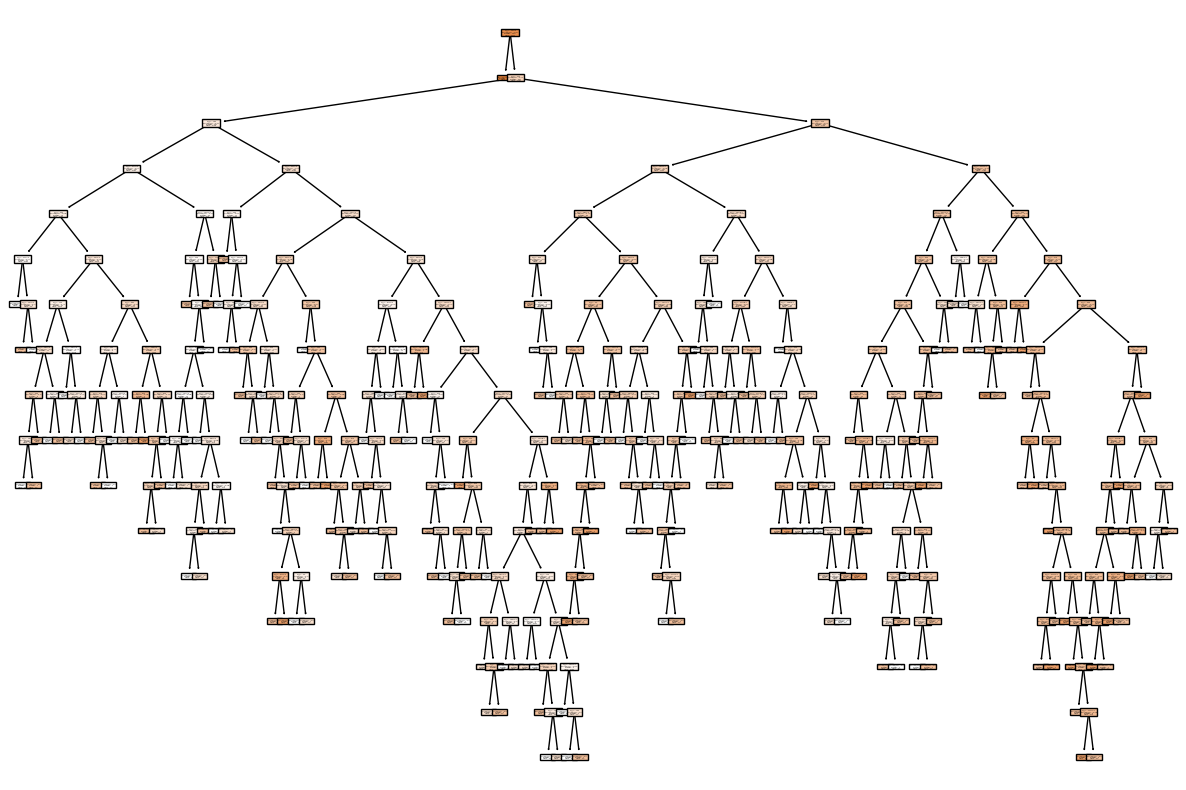

In [68]:
plt.figure(figsize = (15,10))
tree.plot_tree(model1, filled = True)
plt.show()